# **Question 9**

In [1]:
#imports and downloads required in this project
from google.colab import drive
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from statsmodels.regression.linear_model import OLS
from sklearn.ensemble import RandomForestRegressor
import itertools
import numpy as np
import seaborn as sns
from sklearn.tree import export_graphviz
import pydot
from statsmodels.api import add_constant
import itertools
import json
from statistics import mean
import math
from datetime import datetime, date, time
import statsmodels.api as sm
from sklearn import metrics
import pytz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, mean_squared_error
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
#mounting the drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
files = ['ECE219_tweet_data/tweets_#gohawks.txt', 'ECE219_tweet_data/tweets_#gopatriots.txt',
         'ECE219_tweet_data/tweets_#nfl.txt', 'ECE219_tweet_data/tweets_#patriots.txt',
         'ECE219_tweet_data/tweets_#sb49.txt', 'ECE219_tweet_data/tweets_#superbowl.txt']

In [ ]:
# Initialize lists to store statistics for each hashtag
for file_name in files:
    # Open the file and read each line
    with open('gdrive/My Drive/Winter Quarter 2024/219 - Large Scale Data Mining/Project 4/'+file_name, 'r') as file:
        tweets = file.readlines()

    # Initialize variables to store information for this hashtag
    total_tweets = len(tweets)
    total_followers = 0
    total_retweets = 0
    prev_hour = None
    tweets_in_hour = 0
    max_time = 0
    min_time = np.inf

    # Iterate over each tweet in the file
    for tweet in tweets:
        tweet_data = json.loads(tweet)

        # Calculate number of followers of the person tweeting
        followers_count = tweet_data['author']['followers']

        # Calculate number of retweets of the tweet
        retweet_count = tweet_data['metrics']['citations']['total']
        # Calculate time the tweet was posted (in hours)
        if tweet_data['citation_date'] > max_time:
          max_time = tweet_data['citation_date']
        if tweet_data['citation_date'] < min_time:
          min_time = tweet_data['citation_date']

        total_followers += followers_count
        total_retweets += retweet_count

    avg_tweets_per_hour = total_tweets * 3600 / (max_time - min_time)
    # Calculate average number of followers per tweet
    avg_followers_per_tweet = total_followers / total_tweets

    # Calculate average number of retweets per tweet
    avg_retweets_per_tweet = total_retweets / total_tweets
    print("For ", file_name )
    print("Average tweets per hour are:", avg_tweets_per_hour)
    print("Average number of followers of users posting the tweets per tweet are:",avg_followers_per_tweet)
    print("Average number of retweets per tweet:",avg_retweets_per_tweet)


For  ECE219_tweet_data/tweets_#gohawks.txt
Average tweets per hour are: 292.48785062173687
Average number of followers of users posting the tweets per tweet are: 2217.9237355281984
Average number of retweets per tweet: 2.0132093991319877
For  ECE219_tweet_data/tweets_#gopatriots.txt
Average tweets per hour are: 40.954698006061946
Average number of followers of users posting the tweets per tweet are: 1427.2526051635405
Average number of retweets per tweet: 1.4081919101697078
For  ECE219_tweet_data/tweets_#nfl.txt
Average tweets per hour are: 397.0213901819841
Average number of followers of users posting the tweets per tweet are: 4662.37544523693
Average number of retweets per tweet: 1.5344602655543254
For  ECE219_tweet_data/tweets_#patriots.txt
Average tweets per hour are: 750.8942646068899
Average number of followers of users posting the tweets per tweet are: 3280.4635616550277
Average number of retweets per tweet: 1.7852871288476946
For  ECE219_tweet_data/tweets_#sb49.txt
Average twee

In [ ]:
hashtag_files = ['tweets_#nfl.txt','tweets_#superbowl.txt']

In [ ]:
pst_tz = pytz.timezone('America/Los_Angeles')

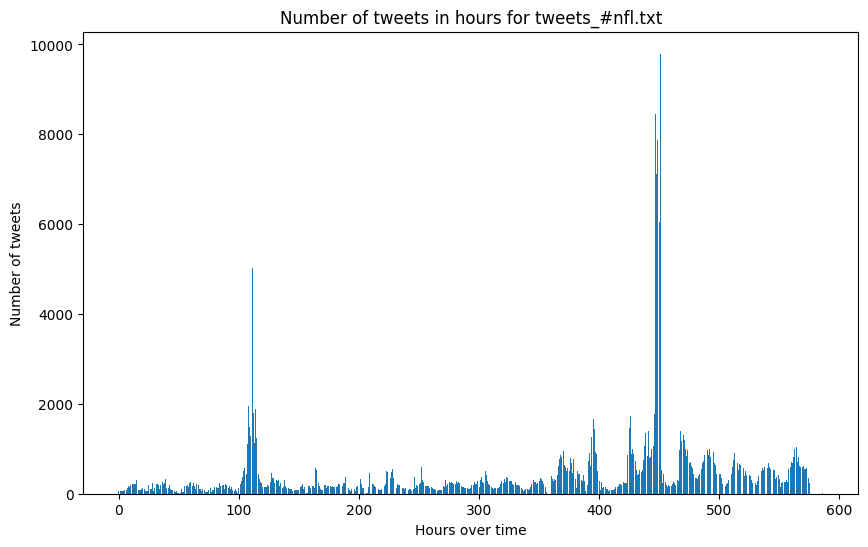

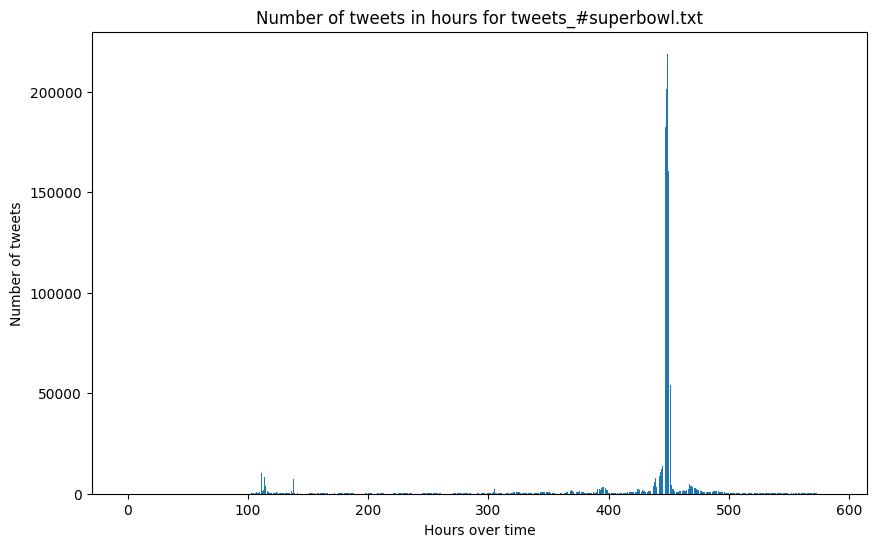

In [ ]:
#Plotting the number of tweets in hour over time for #SuperBowl and #NFL
for hashtag_file in hashtag_files:
    with open('gdrive/My Drive/Winter Quarter 2024/219 - Large Scale Data Mining/Project 4/ECE219_tweet_data/'+hashtag_file, 'r') as file:
        tweets = file.readlines()
        max_time = 0
        min_time = np.inf
        total_tweets = len(tweets)
        for tweet in tweets:
            json_obj = json.loads(tweet)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
        total_hours = math.ceil((max_time - min_time) / 3600)
        #print(total_hours)
        n_tweets = [0] * total_hours
        for tweet in tweets:
            json_obj = json.loads(tweet)
            index = math.floor((json_obj['citation_date'] - min_time) / 3600)
            n_tweets[index] += 1
    plt.figure(figsize=(10,6))
    plt.bar(range(len(n_tweets)),n_tweets)
    plt.xlabel('Hours over time')
    plt.ylabel('Number of tweets')
    plt.title('Number of tweets in hours for '+hashtag_file)

QUESTION 9:
* Question 9.1 - Report the following statistics for each hashtag, i.e. each file has:

- Average number of tweets per hour

- Average number of followers of users posting the tweets per tweet (to make it simple, we average over the number of tweets; if a users posted twice, we count the user and the user’s followers twice as well)

- Average number of retweets per tweet

> For  ECE219_tweet_data/tweets_#gohawks.txt\
Average tweets per hour are: 292.48785062173687\
Average number of followers of users posting the tweets per tweet are: 2217.9237355281984\
Average number of retweets per tweet: 2.0132093991319877

> For  ECE219_tweet_data/tweets_#gopatriots.txt\
Average tweets per hour are: 40.954698006061946\
Average number of followers of users posting the tweets per tweet are: 1427.2526051635405\
Average number of retweets per tweet: 1.4081919101697078

>For  ECE219_tweet_data/tweets_#nfl.txt\
Average tweets per hour are: 397.0213901819841\
Average number of followers of users posting the tweets per tweet are: 4662.37544523693\
Average number of retweets per tweet: 1.5344602655543254

>For  ECE219_tweet_data/tweets_#patriots.txt\
Average tweets per hour are: 750.8942646068899\
Average number of followers of users posting the tweets per tweet are: 3280.4635616550277\
Average number of retweets per tweet: 1.7852871288476946

>For  ECE219_tweet_data/tweets_#sb49.txt\
Average tweets per hour are: 1276.8570598680474\
Average number of followers of users posting the tweets per tweet are: 10374.160292019487\
Average number of retweets per tweet: 2.52713444111402

>For  ECE219_tweet_data/tweets_#superbowl.txt\
Average tweets per hour are: 2072.11840170408\
Average number of followers of users posting the tweets per tweet are: 8814.96799424623\
Average number of retweets per tweet: 2.3911895819207736

* Question 9.2 - Plot “number of tweets in hour” over time for #SuperBowl and #NFL (a bar plot with 1-hour bins). The tweets are stored in separate files for different hashtags and files are named as tweet [#hashtag].txt.

>Refer to the graphs above. Both the histograms have different life cycle patterns but we can see that they both peak at the 450th hour. We know that the data is collected 2 weeks before the game to a week after the game. Therefore, the peak is when the game was going on. The discussion is concentrated around the time when the superbowl and nfl were actually going on.  

# **Question 10**

TASK - **Library of Prediction Tasks given a tweet:**

>Predict the hashtags or how likely it is that a tweet belongs to a specific team fan.

>Predict the number of retweets/likes/quotes.

>Predict the relative time at which a tweet was posted.

Feature Analysis

First we will carry out some feature analysis on all the six files

In [ ]:
#Feature Analysis
#Find the intersected time intervals for all twitter data
def get_intersected_time_interval(filename):
    with open('gdrive/My Drive/Winter Quarter 2024/219 - Large Scale Data Mining/Project 4/'+filename, 'r') as file:
        tweets = file.readlines()
        max_time = 0
        min_time = np.inf
        for tweet in tweets:
            json_obj = json.loads(tweet)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
        return max_time, min_time

#Making a list for the max and min time
max_time_list = []
min_time_list = []
for file in files:
    max_time, min_time = get_intersected_time_interval(file)
    max_time_list.append(max_time)
    min_time_list.append(min_time)

max_time_agg = min(max_time_list)
min_time_agg = max(min_time_list)

In [ ]:
#List of features that we will extract from the data
extracted_feature_names = ['Number of tweets', 'Total number of retweets', 'Sum of the number of followers',
                'Maximum number of followers', 'Time of the day', 'Sum of ranking score',
                'Sum of passivity', 'Total number of unique users','Total number of unique authors',
                'Total number of user mentions']

month_to_integer = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [ ]:
#Function to get the number of days since the user account was created
def get_days(time_user_is_created, time_tweet_is_made):
    date_user_is_created = time_user_is_created.split(' ')
    date_tweet_is_made = time_tweet_is_made.split(' ')
    user_create_date = datetime(int(date_user_is_created[-1]), month_to_integer[date_user_is_created[1]], int(date_user_is_created[2]))
    tweet_create_date = datetime(int(date_tweet_is_made[-1]), month_to_integer[date_tweet_is_made[1]], int(date_tweet_is_made[2]))
    created_days = tweet_create_date - user_create_date
    created_days = created_days.days
    return created_days


In [ ]:
#Function to extract all the features mentioned above.
def report_features(filename, min_time, max_time):
    with open('gdrive/My Drive/Winter Quarter 2024/219 - Large Scale Data Mining/Project 4/'+filename, 'r') as file:
        tweets = file.readlines()

        total_hours = math.ceil((max_time - min_time) / 3600)
        user_ids = {hour:set() for hour in range(total_hours)}
        author_nick = {hour:set() for hour in range(total_hours)}

        #initialize features
        extracted_features = np.zeros((total_hours,len(extracted_feature_names)))

        for hour in range(total_hours):
            extracted_features[hour][4] = datetime.fromtimestamp((min_time + hour * 3600), pst_tz).hour

        for tweet in tweets:
            json_obj = json.loads(tweet)

            #Checking if it is between the time interval
            if json_obj['citation_date'] >= min_time and json_obj['citation_date'] <= max_time:
                index = math.floor((json_obj['citation_date'] - min_time) / 3600)
                #Increasing the count of the number of tweets
                extracted_features[index][0] += 1

                #Increasing the count of the number of retweets
                extracted_features[index][1] += json_obj['metrics']['citations']['total']

                #Increasing the count of the number of followers
                extracted_features[index][2] += json_obj['author']['followers']

                #Storing the max number of followers
                extracted_features[index][3] = max(extracted_features[index][3], json_obj['author']['followers'])

                #Storing the sum of the ranking score
                extracted_features[index][5] += json_obj['metrics']['ranking_score']

                #Calculating the number of days since the account is created
                n_days = get_days(json_obj['tweet']['user']['created_at'], json_obj['tweet']['created_at'])

                #Storing the sum of passitivity
                extracted_features[index][6] += n_days/(1.0 + json_obj['tweet']['user']['statuses_count'])

                if json_obj['tweet']['user']['id'] not in user_ids[index]:
                    user_ids[index].add(json_obj['tweet']['user']['id'])

                #Storing the number fo unique users
                extracted_features[index][7] = len(user_ids[index])
                if json_obj['author']['nick'] not in author_nick[index]:
                    author_nick[index].add(json_obj['author']['nick'])

                #Storing the number of unique authors
                extracted_features[index][8] = len(author_nick[index])

                #Storing the number of user mentions
                extracted_features[index][9] += len(json_obj['tweet']['entities']['user_mentions'])

        return extracted_features

In [ ]:
#Plotting a scatter plot for each hastag
def scatter_plot(features, hashtag, y_pred, pvalues, extracted_feature_names):
    index_value = np.argsort(pvalues)
    print('Hashtag: ' + hashtag)
    for i in range(5):
        plt.figure(figsize = (7,5))
        plt.scatter(features[:,index_value[i]], y_pred)
        plt.xlabel(extracted_feature_names[index_value[i]])
        plt.ylabel("Number of tweets in the next hour")
        plt.grid(True)
        plt.show()
    print('-' * 50)

Hashtag: ECE219_tweet_data/tweets_#gohawks.txt
MSE:  296042.31731156004
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              201.8
Date:                Sat, 16 Mar 2024   Prob (F-statistic):                   1.43e-178
Time:                        03:41:27   Log-Likelihood:                         -4407.0
No. Observations:                 571   AIC:                                      8834.
Df Residuals:                     561   BIC:                                      8878.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t     

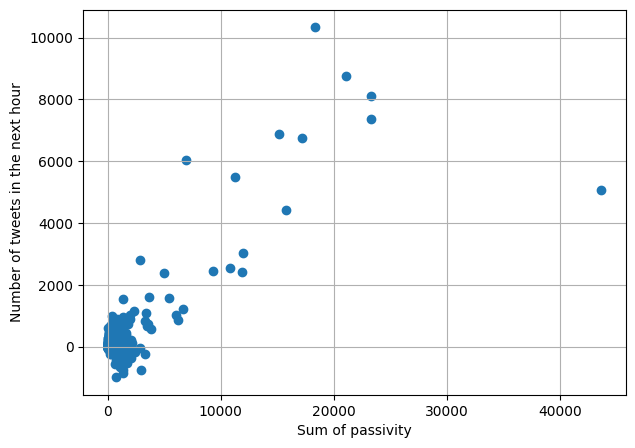

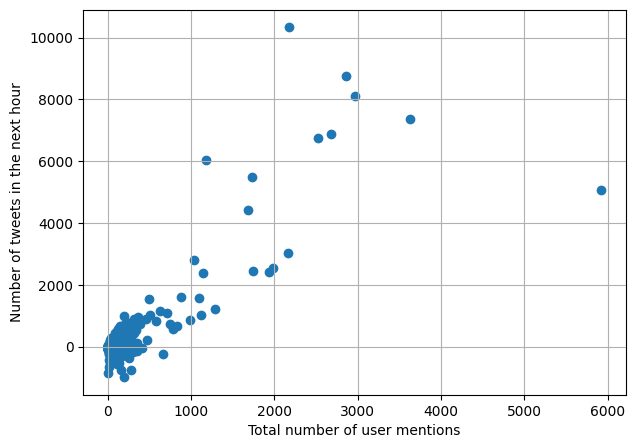

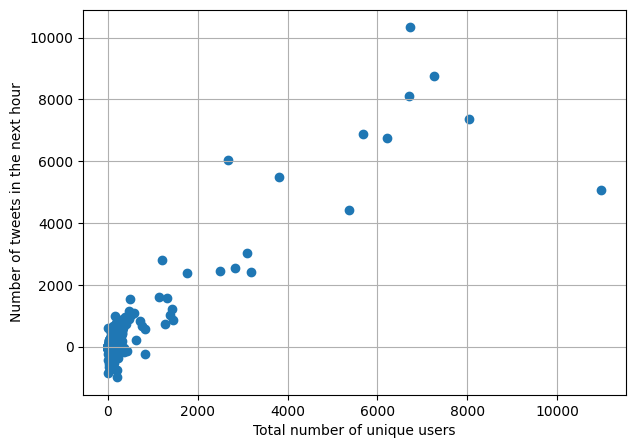

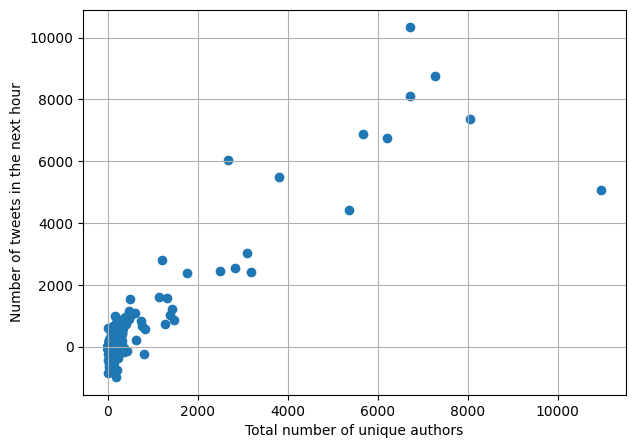

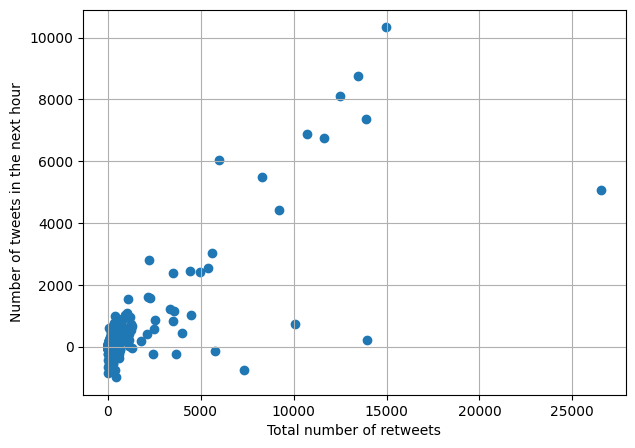

--------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#gopatriots.txt
MSE:  21727.945699825843
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              161.6
Date:                Sat, 16 Mar 2024   Prob (F-statistic):                   5.56e-158
Time:                        03:41:30   Log-Likelihood:                         -3661.3
No. Observations:                 571   AIC:                                      7343.
Df Residuals:                     561   BIC:                                      7386.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                           

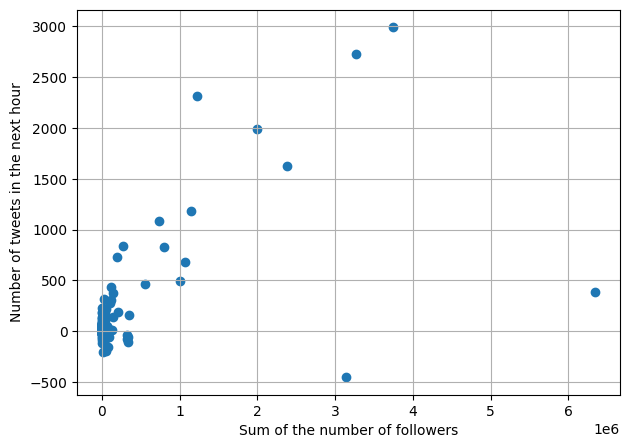

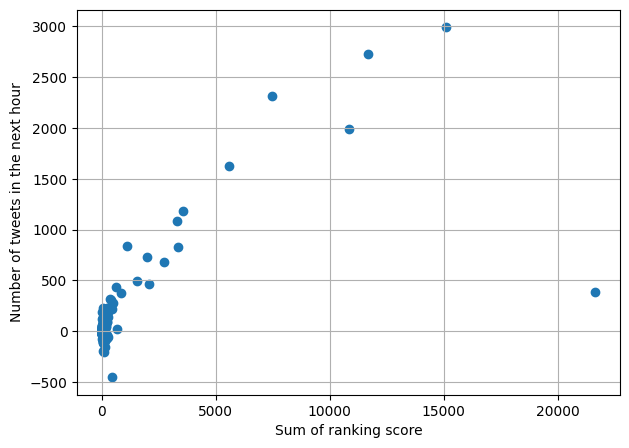

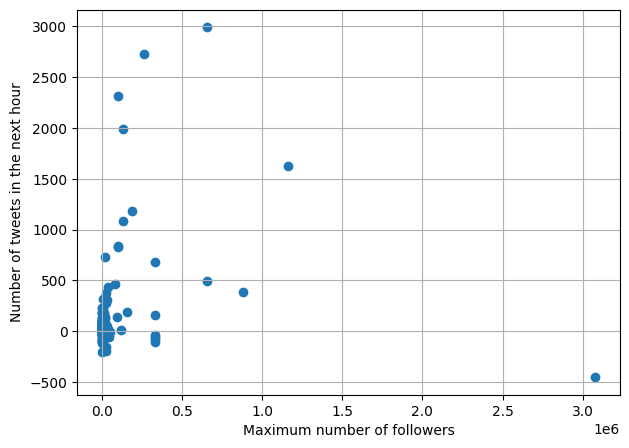

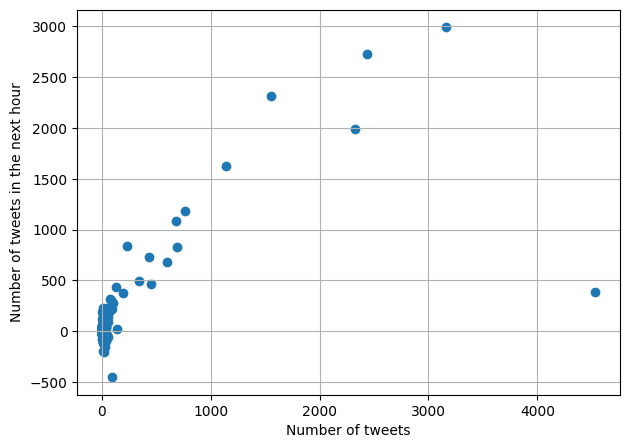

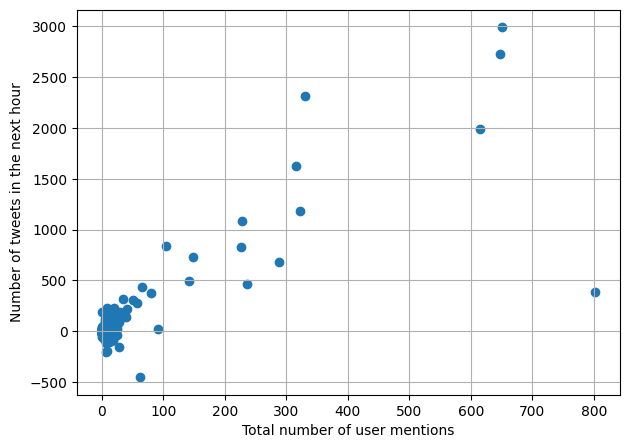

--------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#nfl.txt
MSE:  184288.3990593135
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.768
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              186.0
Date:                Sat, 16 Mar 2024   Prob (F-statistic):                   7.02e-171
Time:                        03:41:56   Log-Likelihood:                         -4271.7
No. Observations:                 571   AIC:                                      8563.
Df Residuals:                     561   BIC:                                      8607.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  


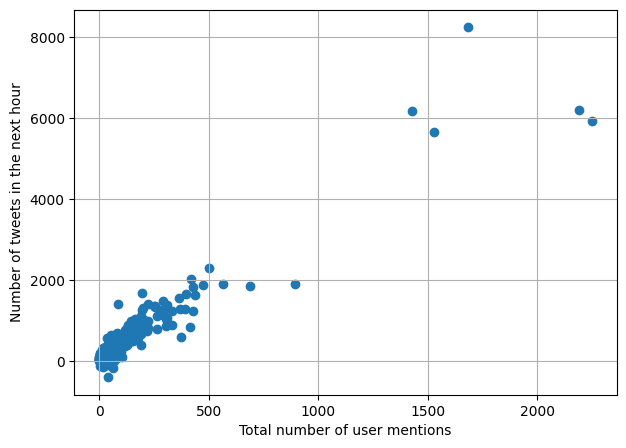

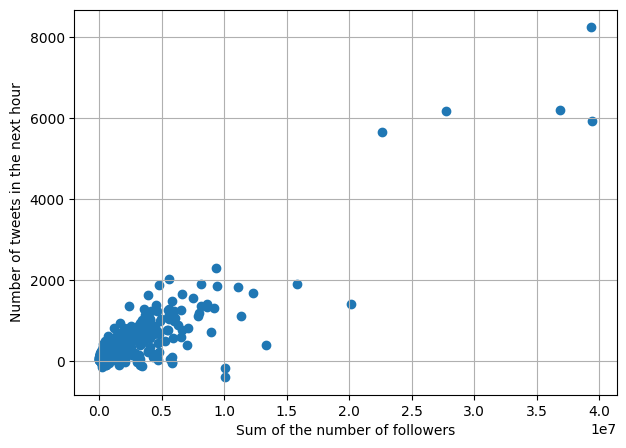

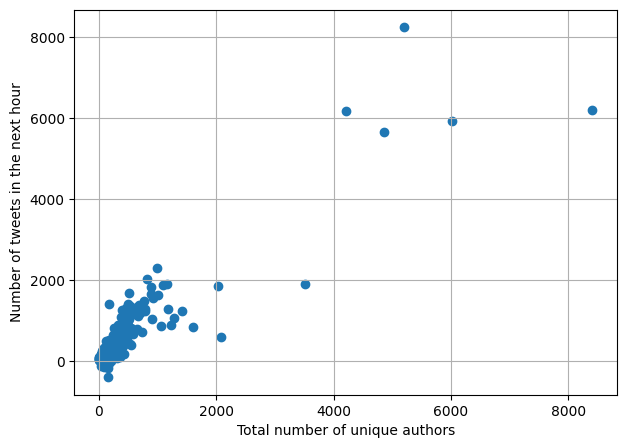

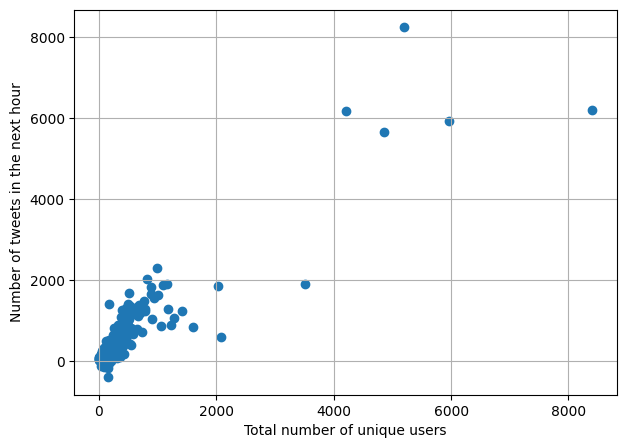

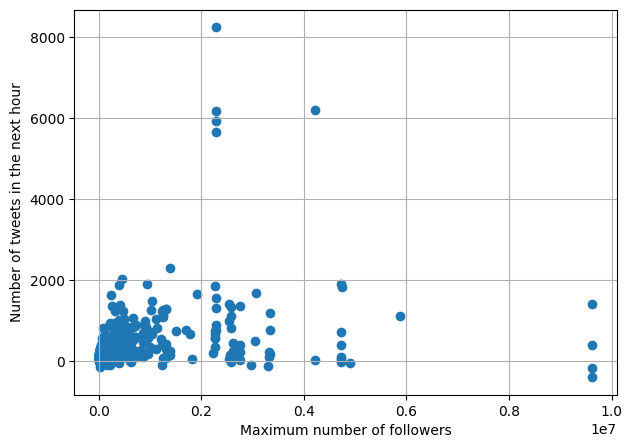

--------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#patriots.txt
MSE:  3619767.990944837
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              202.0
Date:                Sat, 16 Mar 2024   Prob (F-statistic):                   1.18e-178
Time:                        03:42:35   Log-Likelihood:                         -5121.8
No. Observations:                 571   AIC:                                  1.026e+04
Df Residuals:                     561   BIC:                                  1.031e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                              

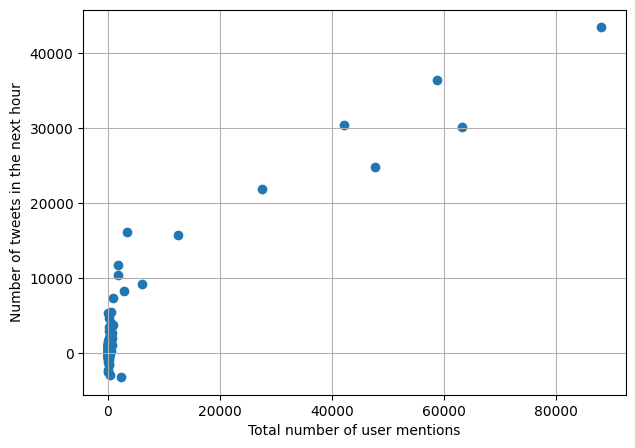

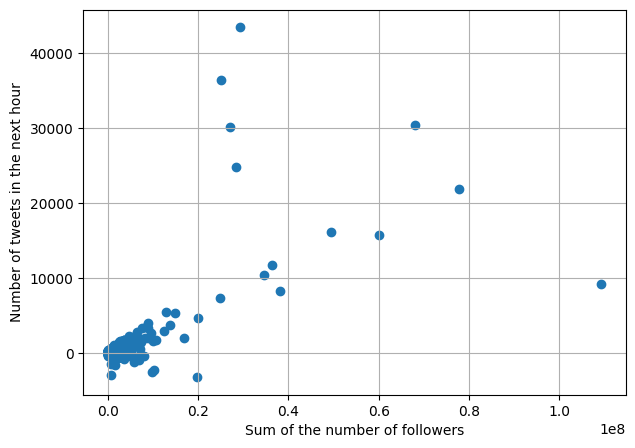

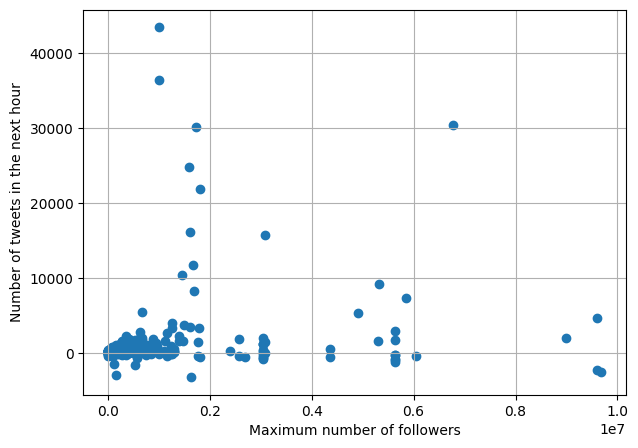

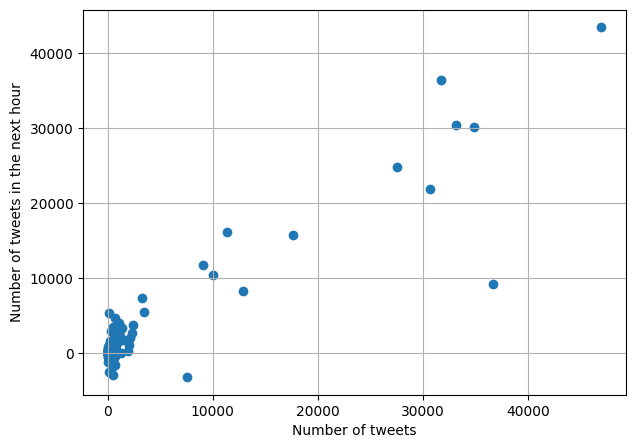

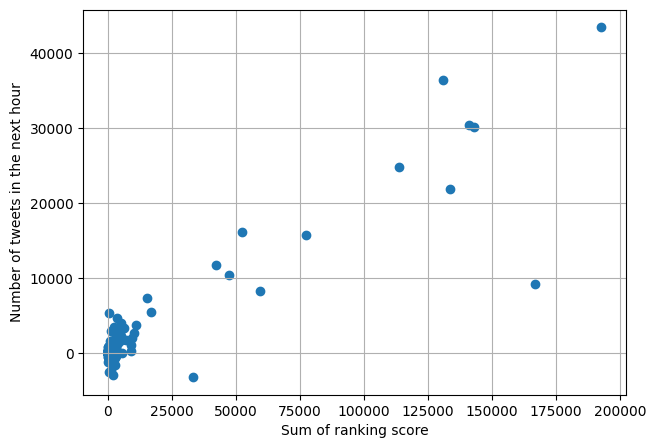

--------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#sb49.txt
MSE:  8860126.964503309
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              480.7
Date:                Sat, 16 Mar 2024   Prob (F-statistic):                   1.30e-267
Time:                        03:43:42   Log-Likelihood:                         -5377.4
No. Observations:                 571   AIC:                                  1.077e+04
Df Residuals:                     561   BIC:                                  1.082e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  

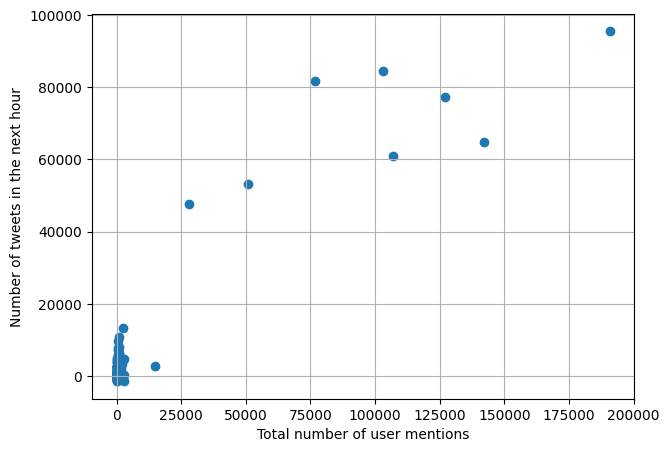

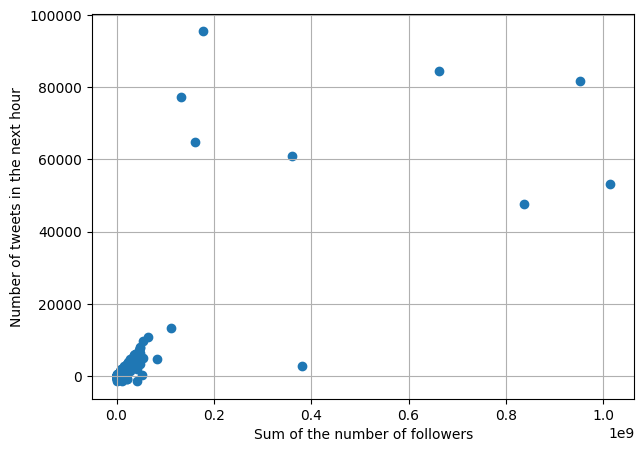

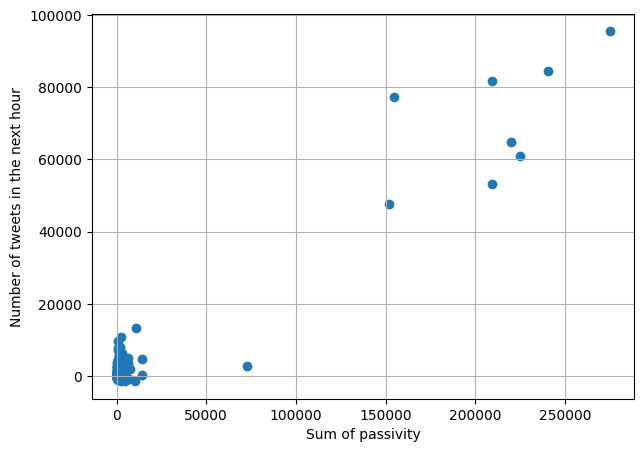

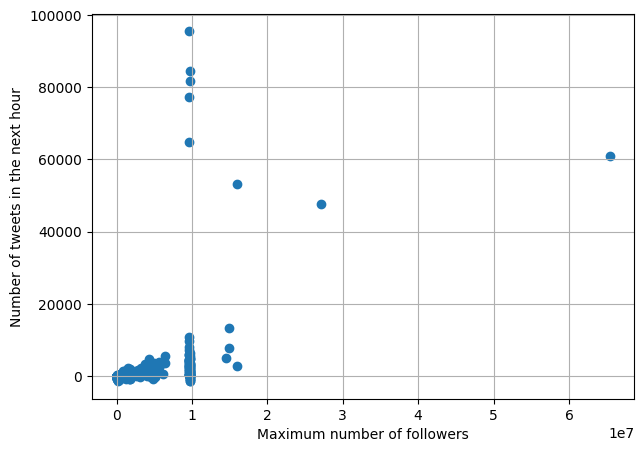

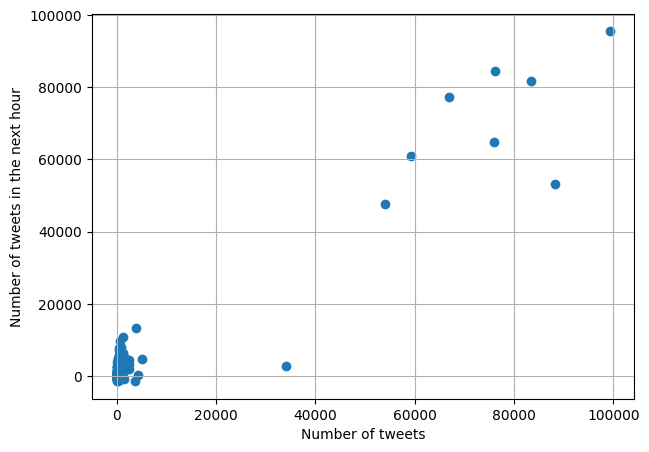

--------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#superbowl.txt
MSE:  15458967.54483511
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              932.3
Date:                Sat, 16 Mar 2024   Prob (F-statistic):                        0.00
Time:                        03:45:31   Log-Likelihood:                         -5536.3
No. Observations:                 571   AIC:                                  1.109e+04
Df Residuals:                     561   BIC:                                  1.114e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                             

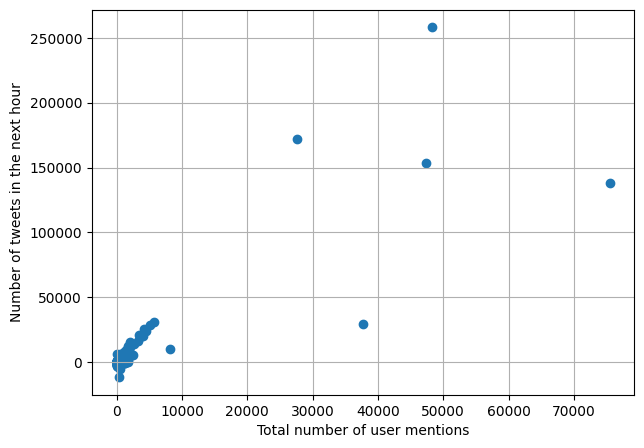

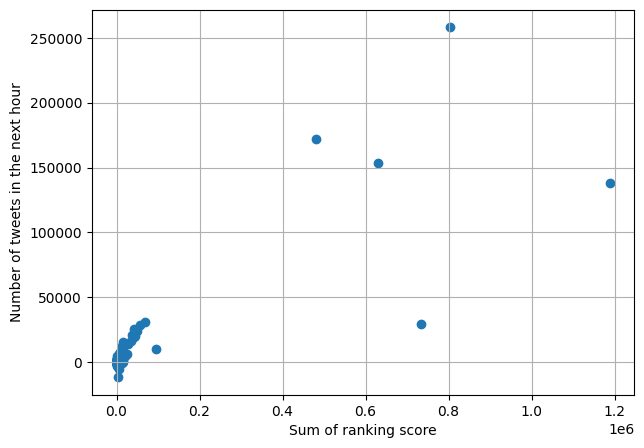

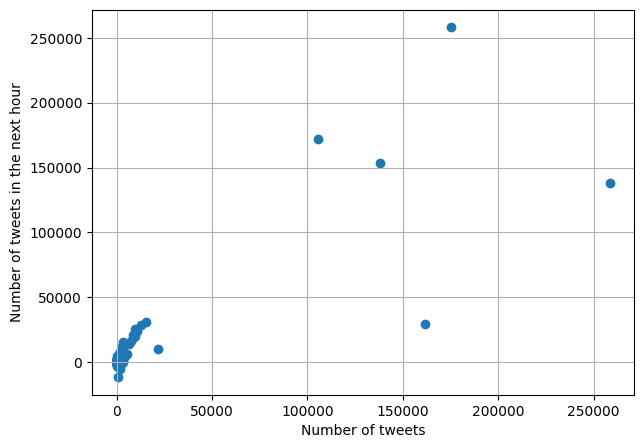

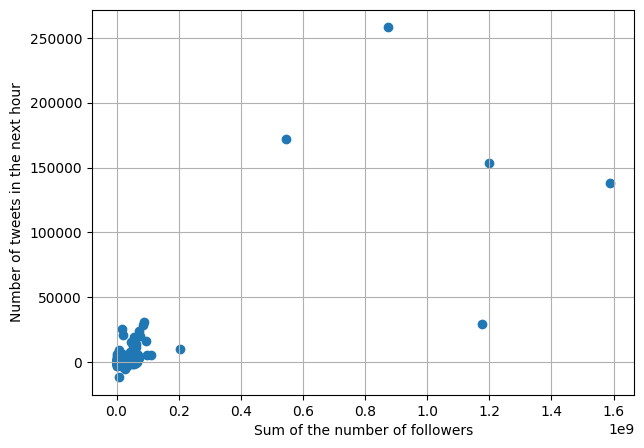

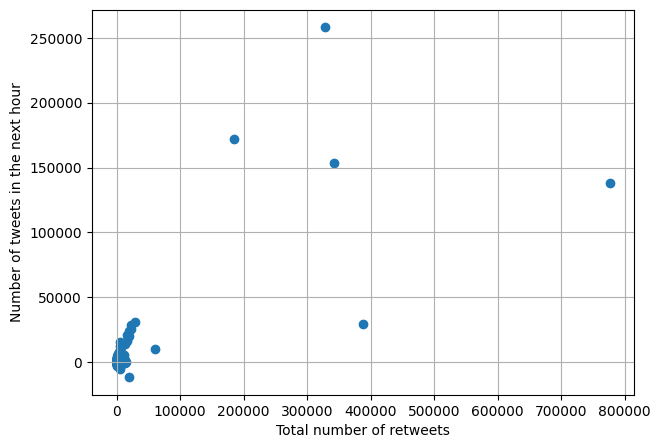

--------------------------------------------------




In [ ]:
#Printing mean square error, top 5 features and scatter plot
for file in files:
    features = report_features(file, min_time_agg, max_time_agg)
    X = features[:-1,:]
    Y = features[1:,0]

    ols_fit = sm.OLS(Y,X).fit()
    Y_pred = ols_fit.predict()
    pvalues = ols_fit.pvalues
    print('Hashtag: ' + file)
    print('MSE: ', metrics.mean_squared_error(Y, Y_pred))
    print(ols_fit.summary())
    scatter_plot(X, file, Y_pred, pvalues, extracted_feature_names)
    print('\n')

Feature Engineering

In [ ]:
# Load tweet dataset and extracting only certain columns from it
hashtags = ["#gohawks", "#gopatriots", "#nfl", "#patriots", "#sb49", "#superbowl"]
tweet_data = {}

for hashtag in hashtags:
    filename = f"ECE219_tweet_data/tweets_{hashtag}.txt"
    with open('gdrive/My Drive/Winter Quarter 2024/219 - Large Scale Data Mining/Project 4/'+filename, 'r') as file:
        tweets = file.readlines()
    tweet_list = []
    for tweet in tweets:
        tweetData = json.loads(tweet)
        tweet_entry = {
            "tweet_id": tweetData['tweet']['id'],
            "timestamp": tweetData['citation_date'],
            "user_name": tweetData['author']['name'],
            "tweet_content": tweetData['tweet']['text'],
            "retweet": tweetData['tweet']['retweet_count']
        }

        tweet_list.append(tweet_entry)
    tweet_data[hashtag] = pd.DataFrame(tweet_list)
print(tweet_data)

{'#gohawks':                   tweet_id   timestamp      user_name  \
0       549327579782840320  1421518778             RJ   
1       549575600210718721  1421259536      Marina EQ   
2       549647876406534144  1421468519  Becca Delgado   
3       549658771749101568  1421468497  Becca Delgado   
4       549989186950803456  1421468336  Becca Delgado   
...                    ...         ...            ...   
169117  563946446702264320  1423290285    /r/Seahawks   
169118  563952234178691072  1423291665      Charles R   
169119  563968915793903617  1423295642    Kim Jackson   
169120  563969561184460800  1423295796    /r/Seahawks   
169121  564005099874181122  1423304269           Cara   

                                            tweet_content  retweet  
0       I &lt;3 our defense! #GoHawks http://t.co/U1pc...        2  
1       twelfth dogs are ready! #gohawks #dogslife htt...        0  
2       "Oh no big deal, just NFC West Champs and the ...        0  
3       At http://t.co/Vd0

In [ ]:
#Checking the values for each hashtag
for hashtag, df in tweet_data.items():
  print(hashtag)
  print(df)

#gohawks
                  tweet_id   timestamp      user_name  \
0       549327579782840320  1421518778             RJ   
1       549575600210718721  1421259536      Marina EQ   
2       549647876406534144  1421468519  Becca Delgado   
3       549658771749101568  1421468497  Becca Delgado   
4       549989186950803456  1421468336  Becca Delgado   
...                    ...         ...            ...   
169117  563946446702264320  1423290285    /r/Seahawks   
169118  563952234178691072  1423291665      Charles R   
169119  563968915793903617  1423295642    Kim Jackson   
169120  563969561184460800  1423295796    /r/Seahawks   
169121  564005099874181122  1423304269           Cara   

                                            tweet_content  retweet  
0       I &lt;3 our defense! #GoHawks http://t.co/U1pc...        2  
1       twelfth dogs are ready! #gohawks #dogslife htt...        0  
2       "Oh no big deal, just NFC West Champs and the ...        0  
3       At http://t.co/Vd0RWOe

Predicting the hastags

In [ ]:
#Task 1 - Predict hashtags for all the tweet content
def predict_hashtags_for_data(tweet_data,hashtag):
    tweet_data['hashtag']=hashtag
    X = tweet_data['tweet_content']
    y = tweet_data['hashtag']

    #Splitting the data intro train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Using TD-IDF Vectorization
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    #Using Random Forest as a classifier
    classifier = RandomForestClassifier()
    classifier.fit(X_train_tfidf, y_train)

    y_pred = classifier.predict(X_test_tfidf)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))


In [ ]:
# Run the prediction tasks
for hashtag, df in tweet_data.items():
    print(f"Predicting hashtags for {hashtag}:")
    predict_hashtags_for_data(df,hashtag)
    print("-" * 50)


Predicting hashtags for #gohawks:
Classification Report:
              precision    recall  f1-score   support

    #gohawks       1.00      1.00      1.00     33825

    accuracy                           1.00     33825
   macro avg       1.00      1.00      1.00     33825
weighted avg       1.00      1.00      1.00     33825

--------------------------------------------------
Predicting hashtags for #gopatriots:
Classification Report:
              precision    recall  f1-score   support

 #gopatriots       1.00      1.00      1.00      4703

    accuracy                           1.00      4703
   macro avg       1.00      1.00      1.00      4703
weighted avg       1.00      1.00      1.00      4703

--------------------------------------------------
Predicting hashtags for #nfl:
Classification Report:
              precision    recall  f1-score   support

        #nfl       1.00      1.00      1.00     46605

    accuracy                           1.00     46605
   macro avg      

Predicting how likely it is that a tweet belongs to a specific team fan

In [ ]:
# Define keywords associated with each team
team_keywords = {
    'Seahawks': ['#gohawks'],
    'Patriots': ['#patriots', '#gopats', '#gopatriots'],
    'NFL': ['#nfl'],
    'Sb49': ['#sb49'],
    'Superbowl': ['#superbowl']
}

# Determine fan affiliation based on keywords
def get_fan_affiliation(tweet_text):
    for team, keywords in team_keywords.items():
        for keyword in keywords:
            if keyword in tweet_text.lower():
                return team
    return 'Unknown'  # If no keyword matches, assign as unknown fan


In [ ]:
#Adding a column fan affiliation in the dataframe
for hashtag, df in tweet_data.items():
    tweet_data[hashtag]['fan_affiliation'] = df['tweet_content'].apply(get_fan_affiliation)

In [ ]:
#Checking the hashtag and df values
for hashtag, df in tweet_data.items():
  print(hashtag)
  print(df)

#gohawks
                  tweet_id   timestamp      user_name  \
0       549327579782840320  1421518778             RJ   
1       549575600210718721  1421259536      Marina EQ   
2       549647876406534144  1421468519  Becca Delgado   
3       549658771749101568  1421468497  Becca Delgado   
4       549989186950803456  1421468336  Becca Delgado   
...                    ...         ...            ...   
169117  563946446702264320  1423290285    /r/Seahawks   
169118  563952234178691072  1423291665      Charles R   
169119  563968915793903617  1423295642    Kim Jackson   
169120  563969561184460800  1423295796    /r/Seahawks   
169121  564005099874181122  1423304269           Cara   

                                            tweet_content fan_affiliation  
0       I &lt;3 our defense! #GoHawks http://t.co/U1pc...        Seahawks  
1       twelfth dogs are ready! #gohawks #dogslife htt...        Seahawks  
2       "Oh no big deal, just NFC West Champs and the ...        Seahawks  
3 

In [ ]:
# Example: Task 2 - Predict fan affiliation
def predict_fan_affiliation(tweet_data):
    X = tweet_data['tweet_content']
    y = tweet_data['fan_affiliation']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    classifier = RandomForestClassifier()
    classifier.fit(X_train_tfidf, y_train)

    y_pred = classifier.predict(X_test_tfidf)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

In [ ]:
# Run the prediction tasks
for hashtag, df in tweet_data.items():
    # Evaluate Task 2: Predict fan affiliation
    print(f"Predicting fan affiliation for {hashtag}:")
    predict_fan_affiliation(df)
    print("-" * 50)

Predicting fan affiliation for #gohawks:
Classification Report:
              precision    recall  f1-score   support

    Seahawks       1.00      1.00      1.00     33825

    accuracy                           1.00     33825
   macro avg       1.00      1.00      1.00     33825
weighted avg       1.00      1.00      1.00     33825

--------------------------------------------------
Predicting fan affiliation for #gopatriots:
Classification Report:
              precision    recall  f1-score   support

    Patriots       1.00      1.00      1.00      4688
    Seahawks       1.00      0.33      0.50        15

    accuracy                           1.00      4703
   macro avg       1.00      0.67      0.75      4703
weighted avg       1.00      1.00      1.00      4703

--------------------------------------------------
Predicting fan affiliation for #nfl:
Classification Report:
              precision    recall  f1-score   support

         NFL       0.97      0.99      0.98     3859

In [ ]:
print(f"Predicting fan affiliation for #sb49:")
predict_fan_affiliation(tweet_data['#sb49'])

Predicting fan affiliation for #sb49:
Classification Report:
              precision    recall  f1-score   support

         NFL       0.98      0.22      0.36      1704
    Patriots       1.00      0.92      0.96     38741
        Sb49       0.95      1.00      0.98    105074
    Seahawks       1.00      0.80      0.89      3211

    accuracy                           0.97    148730
   macro avg       0.98      0.74      0.80    148730
weighted avg       0.97      0.97      0.96    148730



In [ ]:
print(f"Predicting fan affiliation for #superbowl:")
predict_fan_affiliation(tweet_data['#superbowl'])

Predicting fan affiliation for #superbowl:


In [ ]:
#Carrying out fan affiliation only on superbowl data and only for Washington and Massachusetts
# exclude any tweets whose author is not from Washington or Massachusetts
WA_substrings = ['Washington', 'Seattle', 'WA']
MA_substrings = ['Massachusetts', 'Boston', 'MA']
superbowl_dataset_trimmed = []

with open('gdrive/My Drive/Winter Quarter 2024/219 - Large Scale Data Mining/Project 4/ECE219_tweet_data/tweets_#superbowl.txt', 'r') as file:
    lines = file.readlines()

    for line in lines:
        json_obj = json.loads(line)
        location = json_obj['tweet']['user']['location']

        for w in WA_substrings:
            if w in location:
                superbowl_dataset_trimmed.append((json_obj['tweet']['text'], 'Washington'))
                break

        for m in MA_substrings:
            if m in location:
                superbowl_dataset_trimmed.append((json_obj['tweet']['text'], 'Massachusetts'))
                break

In [ ]:
# Train a binary classifier
import numpy as np
from sklearn.model_selection import train_test_split

x_superbowl = np.array(superbowl_dataset_trimmed)[:, 0]
y_superbowl = np.array(superbowl_dataset_trimmed)[:, 1]

y_superbowl_binary = np.zeros(y_superbowl.shape)
y_superbowl_binary[y_superbowl == 'Washington'] = 1

x_train, x_test, y_train, y_test = train_test_split(x_superbowl, y_superbowl_binary, test_size=0.1, random_state=42)

In [ ]:
print(np.count_nonzero(y_train == 1))

24367


In [ ]:
print(np.count_nonzero(y_train == 0))

19036


In [ ]:
# pos_tags: treebank to wordnet
mapping = defaultdict(lambda: wn.NOUN)
mapping['J'] = wn.ADJ
mapping['V'] = wn.VERB
mapping['R'] = wn.ADV

#Creating a word net lemmatizer
word_net_lemmatizer = WordNetLemmatizer()

#Function to return the lemmatized string
def lemmatize(data):
    lemmatized = []
    for doc in data:
        tokens = word_tokenize(doc)
        words = [word_net_lemmatizer.lemmatize(word, mapping[tag[0]]) for word,tag in pos_tag(tokens)
                 if word_net_lemmatizer.lemmatize(word, mapping[tag[0]]).isalpha()]
        sentence = ' '.join(words)
        lemmatized.append(sentence)
    return lemmatized

In [ ]:
#Lemmatizing the data
X_train_lemmatized = lemmatize(x_train)
X_test_lemmatized = lemmatize(x_test)

#Doing TF-IDF Transformation
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=3)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_lemmatized)
X_test_tfidf = tfidf_vectorizer.transform(X_test_lemmatized)

#SVD
svd = TruncatedSVD(n_components=50, random_state=42)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

In [ ]:
# Define the logistic regression model
logistic_regression = LogisticRegression()

# Define parameter grid for GridSearchCV
param_grid = [
    {'penalty': ['l1'], 'solver': ['liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100] },
    {'penalty': ['l2'],  'C': [0.001, 0.01, 0.1, 1, 10, 100] }
    #{'penalty': ['elasticnet'],'C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

# Create a pipeline with logistic regression and GridSearchCV
pipeline = Pipeline([
    ('clf', GridSearchCV(logistic_regression, param_grid, cv=10, n_jobs=-1, scoring='accuracy'))
])

# Fit the pipeline on your data
pipeline.fit(X_train_svd, y_train)

# Get the best parameters
best_params = pipeline.named_steps['clf'].best_params_
print("Best parameters:", best_params)

# Evaluate the model
accuracy = pipeline.score(X_test_svd, y_test)
print("Accuracy:", accuracy)

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7256894049346879


In [ ]:
logistic_reg = LogisticRegression(penalty=pipeline.named_steps['clf'].best_params_['penalty'],
                                    C=pipeline.named_steps['clf'].best_params_['C'], random_state=42, solver = 'liblinear')

logistic_reg.fit(X_train_svd, y_train)

LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

In [ ]:
Y_pred_logistic = logistic_reg.predict(X_test_svd)
Y_pred_prob_logistic = logistic_reg.predict_proba(X_test_svd)[:,1]

print('Logistic Regression:')
print('Confusion Matrix:\n', confusion_matrix(y_test, Y_pred_logistic))
print('Accuracy:', accuracy_score(y_test, Y_pred_logistic))
print('Recall:', recall_score(y_test, Y_pred_logistic))
print('Precision:', precision_score(y_test, Y_pred_logistic))
print('F1_score:', f1_score(y_test, Y_pred_logistic))

Logistic Regression:
Confusion Matrix:
 [[1020 1139]
 [ 184 2480]]
Accuracy: 0.7256894049346879
Recall: 0.9309309309309309
Precision: 0.6852721746338768
F1_score: 0.7894318000954959


In [ ]:
# RandomForest: GridSearch
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipe_rfc = Pipeline([
    ('standardize', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid = {
    'model__max_depth': [10, 30, 50, 70, 100, 200, None]
}


grid_rfc = GridSearchCV(pipe_rfc, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1)
grid_rfc.fit(X_train_svd, y_train)

result_rfc = pd.DataFrame(grid_rfc.cv_results_)[['mean_test_score', 'param_model__max_depth']]
result_rfc = result_rfc.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_rfc.head()

Fitting 5 folds for each of 7 candidates, totalling 35 fits


,mean_test_score,param_model__max_depth
0,0.723729,30
1,0.720595,70
2,0.720595,100
3,0.720595,200
4,0.720595,None


In [ ]:
pipe_rfc_optim = Pipeline([
        ('standardize', StandardScaler()),
        ('model', RandomForestClassifier(max_depth=30, random_state=42))
])

pipe_rfc_optim.fit(X_train_svd, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=30, random_state=42))])

In [ ]:
y_pred_rfc = pipe_rfc_optim.predict(X_test_svd)
y_pred_prob_rfc = pipe_rfc_optim.predict_proba(X_test_svd)[:,1]

print('Random Forest:')
print('Confusion_matrix:\n', confusion_matrix(y_test, y_pred_rfc))
print('Accuracy:', accuracy_score(y_test, y_pred_rfc))
print('Recall:', recall_score(y_test, y_pred_rfc))
print('Precision:', precision_score(y_test, y_pred_rfc))
print('F1_score:', f1_score(y_test, y_pred_rfc))

Random Forest:
Confusion_matrix:
 [[1336  823]
 [ 484 2180]]
Accuracy: 0.7290068422143894
Recall: 0.8183183183183184
Precision: 0.7259407259407259
F1_score: 0.7693665078524792


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

pipe_gbc = Pipeline([
    ('standardize', StandardScaler()),
    ('model', GradientBoostingClassifier(random_state=42))
])

param_grid = {
    'model__max_depth': [10, 30, 50, 70, 100, 200, None]
}


grid_gbc = GridSearchCV(pipe_gbc, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1)
grid_gbc.fit(X_train_svd, y_train)

result_gbc = pd.DataFrame(grid_gbc.cv_results_)[['mean_test_score', 'param_model__max_depth']]
result_gbc = result_gbc.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_gbc.head()

Fitting 5 folds for each of 7 candidates, totalling 35 fits


,mean_test_score,param_model__max_depth
0,0.719328,10
1,0.693731,30
2,0.684745,50
3,0.684653,70
4,0.684261,100


In [ ]:
pipe_gbc_optim = Pipeline([
        ('standardize', StandardScaler()),
        ('model', GradientBoostingClassifier(max_depth=10, random_state=42))
])

pipe_gbc_optim.fit(X_train_svd, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(max_depth=10, random_state=42))])

In [ ]:
y_pred_gbc = pipe_gbc_optim.predict(X_test_svd)
y_pred_prob_gbc = pipe_gbc_optim.predict_proba(X_test_svd)[:,1]

print('Gradient Boosting Classifier:')
print('Confusion_matrix:\n', confusion_matrix(y_test, y_pred_gbc))
print('Accuracy:', accuracy_score(y_test, y_pred_gbc))
print('Recall:', recall_score(y_test, y_pred_gbc))
print('Precision:', precision_score(y_test, y_pred_gbc))
print('F1_score:', f1_score(y_test, y_pred_gbc))

Gradient Boosting Classifier:
Confusion_matrix:
 [[1332  827]
 [ 542 2122]]
Accuracy: 0.7161517727555463
Recall: 0.7965465465465466
Precision: 0.7195659545608681
F1_score: 0.756101906288972


Predict the relative time at which a tweet was posted.

In [ ]:
hashtags = ["#superbowl"]
tweet_data = []

for hashtag in hashtags:
    filename = f"ECE219_tweet_data/tweets_{hashtag}.txt"
    with open('gdrive/My Drive/Winter Quarter 2024/219 - Large Scale Data Mining/Project 4/'+filename, 'r') as file:
        tweets = file.readlines()

    for tweet in tweets:
        tweetData = json.loads(tweet)
        tweet_entry = {
            "timestamp": tweetData['citation_date'],
            "tweet_content": tweetData['tweet']['text']
        }
        tweet_data.append(tweet_entry)


tweet_data = pd.DataFrame(tweet_data)
print(tweet_data)

          timestamp                                      tweet_content
0        1421468497  At http://t.co/Vd0RWOeAed -- #Seahawks #12thMA...
1        1421467579  You been 12ed pass it on #SeahawkNation #LOB #...
2        1421266957  27 days to the SuperBowl 🏈🏈\n#Katyperry #KatyC...
3        1421261298  Check out the cool event that  #budlight has p...
4        1421316031  Lenny Kravitz acompañará a Katy Perry en el #H...
...             ...                                                ...
1213808  1423328580  Look at this crazy map of all the private jets...
1213809  1423330066  Where to start making money online for beginne...
1213810  1423330744  Still in superbowl mode 🏈🏈🏈\n#SB49 #superbowl ...
1213811  1423331367  @pscgt2015 Nice, Debbie! @futieton #SB49 #phx ...
1213812  1423332008  Are you still celebrating the #SuperBowl win? ...

[1213813 rows x 2 columns]


In [ ]:
tweet_data=tweet_data[0:1000]

In [ ]:
tweet_data['tweet_content']

0       I &lt;3 our defense! #GoHawks http://t.co/U1pc...
1       twelfth dogs are ready! #gohawks #dogslife htt...
2       "Oh no big deal, just NFC West Champs and the ...
3       At http://t.co/Vd0RWOeAed -- #Seahawks #12thMA...
4       Good luck at Michigan, Jim Harbaugh. #GoHawks ...
                              ...                        
9995    @ehasselbeck @foxandfriends I know this is lat...
9996    You are a hero to us, Lance. #GBvsSEA #NFCCham...
9997    “@ESPNNFL: RT if you have the @Seahawks winnin...
9998    @ScienceAlert Go #Seahawks!! :) #12thMan #GoHa...
9999    “@dariusrucker: Who you got tomorrow? Dolphins...
Name: tweet_content, Length: 10000, dtype: object

In [ ]:
def predict_relative_time(tweet_data):
    # tweet_data_numeric = np.copy(tweet_data)
    # tweet_data_numeric[:, 0] = tweet_data_numeric[:, 0].astype(int)

    # X = tweet_data_numeric[:, 1]  # Extract tweet content from numpy list
    # y = tweet_data_numeric[:, 0] - tweet_data_numeric[:, 1].min()  # Relative time

    X = tweet_data['tweet_content']  # Extract tweet content from numpy list
    y = tweet_data['timestamp'] - tweet_data['timestamp'].min()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # logistic_regression = LogisticRegression(random_state=42)
    # logistic_regression.fit(X_train_tfidf, y_train)
    regressor = RandomForestClassifier()
    regressor.fit(X_train_tfidf, y_train)

    y_pred = regressor.predict(X_test_tfidf)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

    print("RMSE:", rmse)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

In [ ]:
print(f"Predicting relative time for superbowl:")
predict_relative_time(tweet_data)

Predicting relative time for superbowl:
RMSE: 44462.765213996754
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
         524       0.00      0.00      0.00         0
        1599       0.00      0.00      0.00         1
        2394       0.00      0.00      0.00         0
        5997       0.00      0.00      0.00         0
        6453       0.00      0.00      0.00         1
        7227       0.00      0.00      0.00         0
        8233       0.00      0.00      0.00         1
       10504       0.00      0.00      0.00         0
       10673       0.00      0.00      0.00         0
       12686       0.00      0.00      0.00         1
       12854       0.00      0.00      0.00         1
       13515       0.00      0.00      0.00         0
       14210       0.00      0.00      0.00         1
       14727       0.00      0.00      0.00         1
       14761       0.00      0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
def predict_relative_time(tweet_data):

    X = tweet_data['tweet_content']  # Extract tweet content from numpy list
    y = tweet_data['timestamp'] - tweet_data['timestamp'].min()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # logistic_regression = LogisticRegression(random_state=42)
    # logistic_regression.fit(X_train_tfidf, y_train)
    regressor = GradientBoostingClassifier()
    regressor.fit(X_train_tfidf, y_train)

    y_pred = regressor.predict(X_test_tfidf)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

    print("RMSE:", rmse)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

In [ ]:
print(f"Predicting relative time for superbowl:")
predict_relative_time(tweet_data)

Predicting relative time for superbowl:
RMSE: 57654.13685235431
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
        1599       0.00      0.00      0.00         1
        2394       0.00      0.00      0.00         0
        5997       0.00      0.00      0.00         0
        6453       0.00      0.00      0.00         1
        8233       0.00      0.00      0.00         1
       10673       0.00      0.00      0.00         0
       12686       0.00      0.00      0.00         1
       12854       0.00      0.00      0.00         1
       14210       0.00      0.00      0.00         1
       14727       0.00      0.00      0.00         1
       14761       0.00      0.00      0.00         1
       15367       0.00      0.00      0.00         1
       16231       0.00      0.00      0.00         1
       16408       0.00      0.00      0.00         1
       18012       0.00      0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Predict the number of retweets/likes/quotes.

In [ ]:
# Example: Task 3 - Predict engagement metrics
# Implement separate functions for each engagement metric (retweets, likes, quotes)
def predict_retweets(tweet_data):
    X = tweet_data['tweet_content']
    y = tweet_data['retweet']  # Assuming you have a 'retweets' column in your data

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    regressor = RandomForestClassifier()
    regressor.fit(X_train_tfidf, y_train)

    y_pred = regressor.predict(X_test_tfidf)

    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    y_pred = regressor.predict(X_test_tfidf)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

In [ ]:
print(f"Predicting retweets for gohawks:")
predict_retweets(tweet_data  ['#gohawks'])

Predicting retweets for gohawks:
Mean Squared Error: 19.89460458240946
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     32893
           1       0.11      0.01      0.01       758
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
print(f"Predicting retweets for gopatriots:")
predict_retweets(tweet_data['#gopatriots'])

Predicting retweets for gopatriots:
Mean Squared Error: 0.046991282160323194
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4612
           1       0.00      0.00      0.00        76
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.98      4703
   macro avg       0.14      0.14      0.14      4703
weighted avg       0.96      0.98      0.97      4703



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Predicting retweets for nfl:")
predict_retweets(tweet_data['#nfl'])

Predicting retweets for nfl:
Mean Squared Error: 89.18528054929729
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     45734
           1       0.17      0.01      0.01       685
           2       0.00      0.00      0.00       113
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          34       0.00      0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [3]:
files = ["tweets_#gohawks.txt", "tweets_#gopatriots.txt", "tweets_#patriots.txt", "tweets_#sb49.txt", "tweets_#superbowl.txt"]

topics = ["gohawks", "gopatriots", "nfl", "patriots", "sb49", "superbowl"]

test_files_1 =["tweets_#nfl.txt"]

for i, fl in enumerate(files):
    print("files[" + str(i) + "] => " + fl)

files[0] => tweets_#gohawks.txt
files[1] => tweets_#gopatriots.txt
files[2] => tweets_#patriots.txt
files[3] => tweets_#sb49.txt
files[4] => tweets_#superbowl.txt


In [4]:
def generate_df(pddata_raw):
    """
    Create a new dataframe with desired form
    """
    df = pd.DataFrame([],columns=['time unit','tweets','retweets','followers sum','followers max','hr_min'])

    col = pddata_raw.columns.get_loc('time')
    df['time unit'] = range(int(pddata_raw.iloc[len(pddata_raw.index)-1,col] - pddata_raw.iloc[0,col]+1))
    df['tweets'] = pddata_raw.groupby("time")['tweets'].sum()
    df['retweets'] = pddata_raw.groupby("time")['retweets'].sum()
    df['followers sum'] = pddata_raw.groupby("time")['followers'].sum()
    df['followers max'] = pddata_raw.groupby("time")["followers"].max()
    df['hr_min'] = pddata_raw.groupby("time")['hr_min'].mean()
    # reset index of df
    df = df.fillna(0).reset_index(drop=True)

    return df

In [5]:
def transfer_time(data_raw,time_type):

    pst_tz = pytz.timezone('America/Los_Angeles')

    # sort according to time
    pddata_raw = pd.DataFrame(data_raw,columns=['time','tweets','retweets','followers','hr_min'])
    pddata_raw = pddata_raw.sort_values(by = 'time')
    pddata_raw = pddata_raw.reset_index(drop=True)

    # calculate hour index and minute index from time
    if time_type == 'hour':
        hour_accu = []
        hour_min = []
        for index, row in pddata_raw.iterrows():
            p = datetime.datetime.fromtimestamp(row['time'], pst_tz)
            hour_accu.append(((p.month-1)*31+p.day)*24+p.hour)
            hour_min.append(p.hour)
        pddata_raw['time'] = hour_accu
        pddata_raw['hr_min'] = hour_min
    elif time_type == 'minute':
        minu_accu = []
        hour_min = []
        for index, row in pddata_raw.iterrows():
            p = datetime.datetime.fromtimestamp(row['time'], pst_tz)
            minu_accu.append((((p.month-1)*31+p.day)*24 + (p.hour-0))*12 + p.minute//5)
            hour_min.append(p.minute//5)
        pddata_raw['time'] = minu_accu
        pddata_raw['hr_min'] = hour_min
    else:
        print("Invalid time type")

    return pddata_raw

In [6]:
def parse(files):
    """
    Parse x conponent of the dataset into pandas DataFrame including columns of:
    tweets, retweets, total_followers, max_followers, mentioned, media, active, author, favourites_count, title
    with lines of hours,
    where mentioned: number of @ in tweets per hour
          media: number of url in tweets per hour
          active: a measure of active state of author
          author: number of unique authors post tweet per hour
          favourites_count: the total number of likes by this user
          title: length of this tweet's title
    Parse y of dataset as number of tweets in the next hour.
    """
    start_time = time.mktime(time.strptime("2015-02-01 08:00:00",'%Y-%m-%d %H:%M:%S'))
    end_time = time.mktime(time.strptime("2015-02-01 20:00:00",'%Y-%m-%d %H:%M:%S'))

    start_hour_idx = ((2-1)*31+1-14)*24+8
    end_hour_idx = ((2-1)*31+1-14)*24+20
    start_minute_idx = (((2-1)*31+1-14)*24 + (8-0))*12 + 0//5

    # extract raw features
    data_raw = [[],[],[]]
    for file in files:
        for line in open('gdrive/My Drive/Winter Quarter 2024/219 - Large Scale Data Mining/Project 4/ECE219_tweet_data/'+file, 'r', encoding="utf-8") :
            row_tmp = []
            a = json.loads(line)
            citation_date = a['citation_date']
            tweet = 1
            retweet = a['metrics']['citations']['total']
            foll = a['author']['followers']
            hr_min=1

            # append to row_tmp
            row_tmp.append(citation_date)
            row_tmp.append(tweet)
            row_tmp.append(retweet)
            row_tmp.append(foll)
            row_tmp.append(hr_min)

            data_raw[0].append(row_tmp)

    # generate raw pandas dataframe
    pddata_raw_1 = transfer_time(data_raw[0],'hour')
    pddata_raw_1['time'] = pddata_raw_1['time'] - pddata_raw_1.loc[0,'time']


    # generate df and df_y for each time slot
    df_1 = generate_df(pddata_raw_1)
    df_y_1 = df_1.iloc[1:,2].reset_index(drop=True)
    df_1 = df_1[:len(df_y_1)]
    #print('2',df_1)


    return (df_1.iloc[:,1:],df_y_1)


In [7]:
def plot_recipe(df_y, pred_y):
    """
    This function plots fitted values vs true values
    """
    plt.figure()
    area = np.pi * (4)**2/4
    plt.scatter(df_y, pred_y, s = area)
    plt.plot([df_y.min(), df_y.max()], [df_y.min(), df_y.max()], 'k--', lw = 1)
    plt.xlabel('true values')
    plt.ylabel('fitted values')
    plt.show()

In [8]:
import datetime,time
df,df_y = parse(files)

In [9]:
df_test1,df_y_test1 = parse(test_files_1)

In [10]:
from sklearn.model_selection import KFold
param_grid={
'max_depth': [10, 50],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2],
'min_samples_split': [2, 5],
'n_estimators': [5,10,50]
}
kf = KFold(n_splits=5,random_state=42,shuffle=True)

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
avg_RMSE1_train=np.zeros((4,2,3,3,8))
avg_RMSE1_test=np.zeros((4,2,3,3,8))
for n1,max_depth in enumerate(param_grid['max_depth']):
    for n2,max_features in enumerate(param_grid['max_features']):
        for n3,min_samples_leaf in enumerate(param_grid['min_samples_leaf']):
            for n4,min_samples_split in enumerate(param_grid['min_samples_split']):
                for n5,n_estimators in enumerate(param_grid['n_estimators']):
                    MSE_train=[]
                    MSE_test=[]
                    oob_error=[]
                    total_train=0
                    total_test=0
                    for train_index, test_index in kf.split(df):
                        X_train= df.iloc[train_index]
                        y_train= df_y.iloc[train_index]
                        X_test= df.iloc[test_index]
                        y_test= df_y.iloc[test_index]
                        reg = GradientBoostingRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split, max_features=max_features,random_state=42)
                        reg.fit(X_train,y_train)
                        pred_train = reg.predict(X_train)
                        pred_test = reg.predict(X_test)
                        MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
                        MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
                        total_train=total_train+len(train_index)
                        total_test=total_test+len(test_index)

                    avg_RMSE1_test[n1,n2,n3,n4,n5]=np.sqrt(sum(MSE_test)/total_test)
                    avg_RMSE1_train[n1,n2,n3,n4,n5]=np.sqrt(sum(MSE_train)/total_train)
                    print("max_depth=",max_depth,"max_features=",max_features,"min_samples_leaf=",min_samples_leaf,"min_samples_split=",min_samples_split,"n_estimators=",n_estimators)
                    print("RMSE_train=",avg_RMSE1_train[n1,n2,n3,n4,n5],"RMSE_test=",avg_RMSE1_test[n1,n2,n3,n4,n5])
                    print("")


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

max_depth= 10 max_features= auto min_samples_leaf= 1 min_samples_split= 2 n_estimators= 5
RMSE_train= 38357.61883190743 RMSE_test= 48436.321107659576

max_depth= 10 max_features= auto min_samples_leaf= 1 min_samples_split= 2 n_estimators= 10
RMSE_train= 22654.28765288923 RMSE_test= 50176.609728735726



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

max_depth= 10 max_features= auto min_samples_leaf= 1 min_samples_split= 2 n_estimators= 50
RMSE_train= 368.95557493797816 RMSE_test= 63840.45575879547

max_depth= 10 max_features= auto min_samples_leaf= 1 min_samples_split= 5 n_estimators= 5
RMSE_train= 41877.44252987733 RMSE_test= 48682.63526714304



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

max_depth= 10 max_features= auto min_samples_leaf= 1 min_samples_split= 5 n_estimators= 10
RMSE_train= 28570.735441850764 RMSE_test= 42358.08166082673



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

max_depth= 10 max_features= auto min_samples_leaf= 1 min_samples_split= 5 n_estimators= 50
RMSE_train= 1319.6762588979084 RMSE_test= 48835.37672710215

max_depth= 10 max_features= auto min_samples_leaf= 2 min_samples_split= 2 n_estimators= 5
RMSE_train= 40956.549362752776 RMSE_test= 46699.72742756745



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

max_depth= 10 max_features= auto min_samples_leaf= 2 min_samples_split= 2 n_estimators= 10
RMSE_train= 27486.21779993644 RMSE_test= 40023.80221828437



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

max_depth= 10 max_features= auto min_samples_leaf= 2 min_samples_split= 2 n_estimators= 50
RMSE_train= 6585.001505629345 RMSE_test= 44810.16719754141

max_depth= 10 max_features= auto min_samples_leaf= 2 min_samples_split= 5 n_estimators= 5
RMSE_train= 42050.401827055066 RMSE_test= 47245.61502341543



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

max_depth= 10 max_features= auto min_samples_leaf= 2 min_samples_split= 5 n_estimators= 10
RMSE_train= 29340.607920314407 RMSE_test= 39541.99634031891



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

max_depth= 10 max_features= auto min_samples_leaf= 2 min_samples_split= 5 n_estimators= 50
RMSE_train= 7333.205683151459 RMSE_test= 47606.94472206453

max_depth= 10 max_features= sqrt min_samples_leaf= 1 min_samples_split= 2 n_estimators= 5
RMSE_train= 38357.97744050092 RMSE_test= 50148.27040925253

max_depth= 10 max_features= sqrt min_samples_leaf= 1 min_samples_split= 2 n_estimators= 10
RMSE_train= 22655.515488961886 RMSE_test= 44133.878486718604

max_depth= 10 max_features= sqrt min_samples_leaf= 1 min_samples_split= 2 n_estimators= 50
RMSE_train= 365.8115057046238 RMSE_test= 49124.975609127956

max_depth= 10 max_features= sqrt min_samples_leaf= 1 min_samples_split= 5 n_estimators= 5
RMSE_train= 42211.979551264216 RMSE_test= 50038.42553739345

max_depth= 10 max_features= sqrt min_samples_leaf= 1 min_samples_split= 5 n_estimators= 10
RMSE_train= 29180.99342687481 RMSE_test= 46381.00943004164

max_depth= 10 max_features= sqrt min_samples_leaf= 1 min_samples_split= 5 n_estimators= 50
R

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

max_depth= 50 max_features= auto min_samples_leaf= 1 min_samples_split= 2 n_estimators= 10
RMSE_train= 22647.2032281019 RMSE_test= 50475.13238885002



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

max_depth= 50 max_features= auto min_samples_leaf= 1 min_samples_split= 2 n_estimators= 50
RMSE_train= 334.7456598654513 RMSE_test= 64308.85666669341

max_depth= 50 max_features= auto min_samples_leaf= 1 min_samples_split= 5 n_estimators= 5
RMSE_train= 41875.06158429869 RMSE_test= 48485.05066537959



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

max_depth= 50 max_features= auto min_samples_leaf= 1 min_samples_split= 5 n_estimators= 10
RMSE_train= 28565.38039099986 RMSE_test= 42041.18212489822



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

max_depth= 50 max_features= auto min_samples_leaf= 1 min_samples_split= 5 n_estimators= 50
RMSE_train= 1265.5241818538923 RMSE_test= 49173.51901422259

max_depth= 50 max_features= auto min_samples_leaf= 2 min_samples_split= 2 n_estimators= 5
RMSE_train= 40954.38203372113 RMSE_test= 46729.80902288338



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

max_depth= 50 max_features= auto min_samples_leaf= 2 min_samples_split= 2 n_estimators= 10
RMSE_train= 27482.456503853773 RMSE_test= 38721.78460501197



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

max_depth= 50 max_features= auto min_samples_leaf= 2 min_samples_split= 2 n_estimators= 50
RMSE_train= 6571.055800523639 RMSE_test= 43151.24046528017

max_depth= 50 max_features= auto min_samples_leaf= 2 min_samples_split= 5 n_estimators= 5
RMSE_train= 42048.7282938227 RMSE_test= 47826.56062904746



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

max_depth= 50 max_features= auto min_samples_leaf= 2 min_samples_split= 5 n_estimators= 10
RMSE_train= 29337.206442804374 RMSE_test= 39932.35966227102



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

max_depth= 50 max_features= auto min_samples_leaf= 2 min_samples_split= 5 n_estimators= 50
RMSE_train= 7314.119986326581 RMSE_test= 47221.25751520282

max_depth= 50 max_features= sqrt min_samples_leaf= 1 min_samples_split= 2 n_estimators= 5
RMSE_train= 38353.23752832714 RMSE_test= 47198.30985963832

max_depth= 50 max_features= sqrt min_samples_leaf= 1 min_samples_split= 2 n_estimators= 10
RMSE_train= 22647.2032281019 RMSE_test= 42877.85830896574

max_depth= 50 max_features= sqrt min_samples_leaf= 1 min_samples_split= 2 n_estimators= 50
RMSE_train= 334.7456598654513 RMSE_test= 46379.36107689861

max_depth= 50 max_features= sqrt min_samples_leaf= 1 min_samples_split= 5 n_estimators= 5
RMSE_train= 42139.64167776385 RMSE_test= 50086.10596706581

max_depth= 50 max_features= sqrt min_samples_leaf= 1 min_samples_split= 5 n_estimators= 10
RMSE_train= 28719.821332789976 RMSE_test= 45811.26284460667

max_depth= 50 max_features= sqrt min_samples_leaf= 1 min_samples_split= 5 n_estimators= 50
RMSE_

In [19]:
print("min RMSE in testset=",np.min(avg_RMSE1_test))
print("parameters:")
n1,n2,n3,n4,n5= np.unravel_index(np.argmin(avg_RMSE1_test), avg_RMSE1_test.shape)
print(n1,n2,n3,n4,n5)
print("Max depth: ",param_grid["max_depth"][n1])
print("Max Features: ",param_grid["max_features"][n2])
print("min_samples_leaf: ",param_grid["min_samples_leaf"][n3])
print("min_samples_split: ",param_grid["min_samples_split"][n4])
print("n_estimators: ",param_grid["n_estimators"][n5-1])

min RMSE in testset= 0.0
parameters:
0 0 0 0 3
Max depth:  10
Max Features:  auto
min_samples_leaf:  1
min_samples_split:  2
n_estimators:  50


In [21]:
reg = GradientBoostingRegressor(n_estimators=50,max_depth=10,min_samples_leaf=1,min_samples_split=2, max_features='auto',random_state=42)

reg.fit(df,df_y)
pred = reg.predict(df)
pred1=reg.predict(df_test1)

print("train_MSE=",mean_squared_error(df_y, pred))
print("test_MSE=",mean_squared_error(df_y_test1, pred1)*len(pred1)/15)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

train_MSE= 150027.32625303467
test_MSE= 70381327.99837264


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

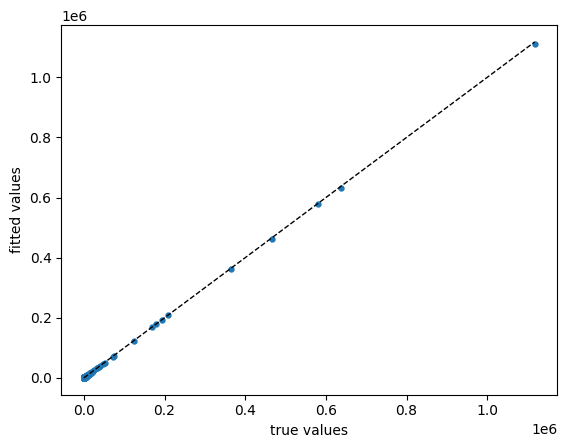

In [22]:
plot_recipe(df_y, pred)

QUESTION 10:

* Describe your task.

> We are going to find the

* Explore the data and any metadata (you can even incorporate additional datasets if you choose).
* Describe the feature engineering process. Implement it with reason: Why are you extracting features this way - why not in any other way?
* Generate baselines for your final ML model.


> We first carried out some feature analysis on the data. We extract only certain features from the entire dataset. The features are as listed below:
['Number of tweets', 'Total number of retweets', 'Sum of the number of followers', 'Maximum number of followers', 'Time of the day', 'Sum of ranking score', 'Sum of passivity', 'Total number of unique users','Total number of unique authors', 'Total number of user mentions']
For all the 6 files, we extracted these features and then fit them to an OLS Regression model. We found the mean square error and plotted the scatter plot for the top 5 features in each file. This gives us an idea of what the files contain and how the features are scattered in each file. The features in each file have important importance levels.
Refer to the OLS Regression results above.

> Predict the hashtags:\
We now first extract the data again. This time we combine the data from all the 6 files and extract only certain columns which are - tweet id, citation date, author name and tweet content. We only keep these columns since we will be requiring them for our analysis. We store this in a dictionary with the hashtag as the key and the value as a dataframe of the above extracted features. For predicting the hashtags, we considered X as the tweet content and the label as the hashtag. We now split the data into train and test and do some feature engineering. We used a TF-IDF Vectorizer and then passed it to a Random Forest Classifier. Extracting features using TF-IDF vectorization is a common approach for natural language processing tasks like text classification or regression. TF-IDF stands for Term Frequency-Inverse Document Frequency, and it is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. TF-IDF helps in reducing the dimensionality of the text data by representing each document as a vector in a high-dimensional space, where each dimension corresponds to a unique word in the corpus. TF-IDF assigns higher weights to words that are more relevant to a specific document but are less common across all documents in the corpus. TF-IDF normalizes the word frequencies by considering both the term frequency (TF) and the inverse document frequency (IDF). TF-IDF representations are sparse, meaning most elements in the vector are zero. The classification report for each hashtag was observed. It was seen that an accuracy of almost 1 was obtained. This was because all the tweet content contained the hashtag in some form or the other and hence the model could easily predict which hashtag it belonged to for all the data.

> Likeliness that the tweet belongs to a specific team fan:\
The same data that was extracted earlier was used. The below teamwords were used for mapping and a new column named fan_affiliation was added.
team_keywords = {\
    'Seahawks': ['#gohawks'],\
    'Patriots': ['#patriots', '#gopats', '#gopatriots'],\
    'NFL': ['#nfl'],\
    'Sb49': ['#sb49'],\
    'Superbowl': ['#superbowl']\
}\
We again split the data, applied TF-IDF Vectorizer and ran Random Forest. The results were obtained for the different files can be found above.\
I also tried another method where I only considered the superbowl file to find fan affiliation. First, I found a count of the locations that are there. To get equally distributed data, we consider only two locations which are Washington and Massachusetts. We find 24367 entries for Washington and 19036 entries for Massachusetts. I first lemmatize the data, then apply a TF-IDF Vectorizer with min_df=3 and stopwords=english. An SVD with 50 components is then applied. To reduce the number of features we select the top 50 features using SVD decomposition, Truncated SVD() function. I tried multiple models as seen above.\
We can see that the accuracy of Random Forest with a max_depth of 30 is the highest.
Our inference from these results is that the model does pretty well for the task of classifying between the fan
teams of Patriots and Hawks from the superbowl dataset. This inference is backed by the accuracy metrics
and the confusion matrix where a clear binary classification between 2 classes is observed.

> Predict the relative time at which a tweet was posted:\
For this, we will be using the timestamp column as the target variable and the tweet content as the feature. We find the relative time. We do the same feature engineering. We split the data, perform TD-IDF Vectorization and then run a random forest regressor. For few of the files, we get the results found above. The accuracy is not very good. Random Forest did not give very good results with this.

> Predict the number of retweets/likes/quotes:\
For this, we will be using the retweet count column as the target variable and the tweet content as the feature. We do the same feature engineering. We split the data, perform TD-IDF Vectorization and then run a random forest regressor. For few of the files, we get the results above.\
We can see that the accuracy is pretty good for all 3 files that I tried on. We could predict on the test set very well the number of retweets that we would see.\
I also tried another way of testing this. The predictive value is changed from the number of tweets in the next hour to the number of retweets in the next hour. The application here is that the number of retweets may be used as a key indication of web advertising. Consider a corporation that can use an embedded advertising technique in a single tweet and then spread the advertisement to a larger audience through a high number of retweets. To forecast the amount of retweets in the following hour, we used five parameters including the number of tweets, total number of retweets, follower numbers, maximum follower number, and time of day. We tried gradient boosting method and performed grid search to find the best fitting model from cross validation and reported the MSE here.\
max_depth= 10 max_features= auto min_samples_leaf= 1 min_samples_split= 2 n_estimators= 50\
RMSE_train= 368.95557493797816 RMSE_test= 63840.45575879547\
The charts above shows that there is an intermediate-strength linear relationship between
the true and forecasted values. As a result, extremely influential tweets have a huge and
significant impact on the overall mood level. The quantity of impressions is a crucial aspect
that influences the overall emotion level.





